In [1]:
# importing important libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
"""
uploading files locally
"""

# from google.colab import files
# uploades = files.upload()

'\nuploading files locally\n'

# Data Description

In [3]:
df=pd.read_csv("diabetes.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


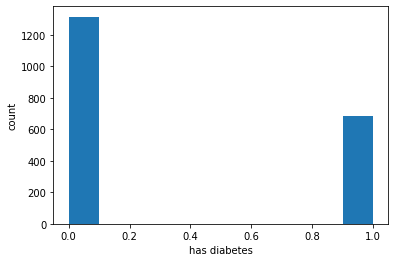

In [7]:
plt.hist(df["Outcome"])
plt.xlabel("has diabetes")
plt.ylabel("count")
plt.show()

In [8]:
# Replacing the 0 values from ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] by NaN
print("\ndf:")
print(df.isin([0]).sum())
df_copy = df.copy(deep=True)

col_list=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
# these column's value cant be zero so we need to replace them with their mean values
# first we will replace them with NaN
df_copy[col_list] = df_copy[col_list].replace(0,np.NaN)

print("\ndf_copy:")
print(df_copy.isnull().sum())


df:
Pregnancies                  301
Glucose                       13
BloodPressure                 90
SkinThickness                573
Insulin                      956
BMI                           28
DiabetesPedigreeFunction       0
Age                            0
Outcome                     1316
dtype: int64

df_copy:
Pregnancies                   0
Glucose                      13
BloodPressure                90
SkinThickness               573
Insulin                     956
BMI                          28
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


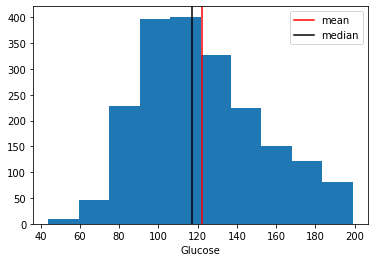

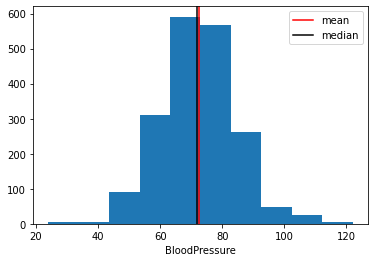

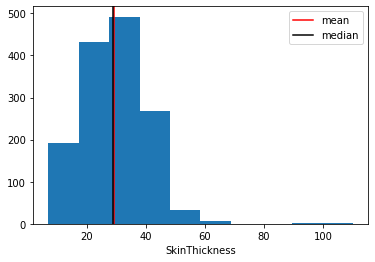

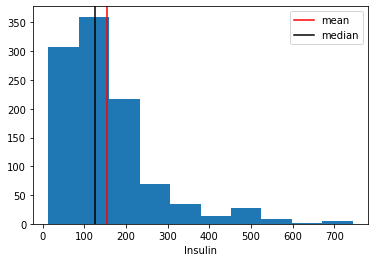

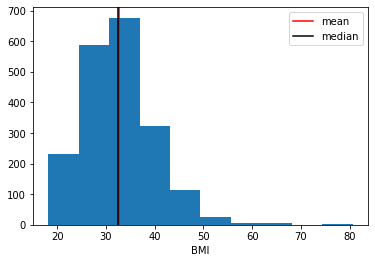

In [9]:
# we will observe the distributions of each columns and appropriately 
# fill the NaN values with either the mean value or median value
# we are not following any mathematicl rule here. It is based on observation 
for x in col_list:
    plt.hist(df_copy[x])
    plt.axvline(df_copy[x].mean(),ymin=0,ymax=df_copy[x].max(),color="red",label="mean")
    plt.axvline(df_copy[x].median(),ymin=0,ymax=df_copy[x].max(),color="black",label="median")
    plt.xlabel(x)
    plt.legend()
    plt.show()

In [10]:
# we will observe the distributions of each columns and appropriately 
# fill the NaN values with either the mean value or median value
# we are not following any mathematicl rule here. It is based on observation 
df_copy['Glucose'].fillna(df_copy['Glucose'].median(), inplace=True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace=True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].mean(), inplace=True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace=True)
df_copy['BMI'].fillna(df_copy['BMI'].mean(), inplace=True)

print("\ndf_copy:")
print(df_copy.isnull().sum())


df_copy:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


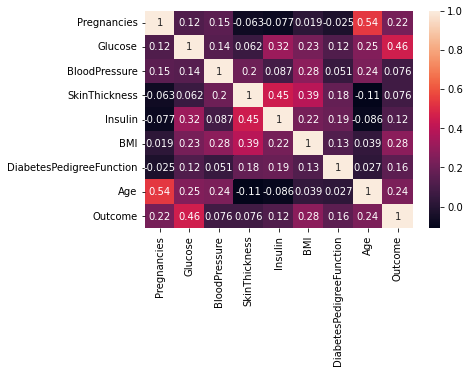

In [11]:
sns.heatmap(df.corr(method='pearson'), annot=True)

In [12]:
from sklearn.model_selection import train_test_split

random.seed(0)
X = df.drop(columns='Outcome')
y = df['Outcome']

# training set: 60%
# cross validation set: 20%
# test set: 20%

X_train, X_, y_train, y_ = train_test_split(X, y, test_size=0.40, random_state=0)
X_cv, X_test, y_cv, y_test = train_test_split(X_, y_, test_size=0.50, random_state=0)
del X_,y_

print(f"X_train size: {X_train.shape}, X_cv size: {X_cv.shape}, X_test size: {X_test.shape}")
print(f"y_train size: {y_train.shape}, y_cv size: {y_cv.shape}, y_test size: {y_test.shape}")

X_train size: (1200, 8), X_cv size: (400, 8), X_test size: (400, 8)
y_train size: (1200,), y_cv size: (400,), y_test size: (400,)


In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_cv = sc.transform(X_cv)
X_test = sc.transform(X_test)

In [14]:
def model_definition(lam,input_size=8,output_size=1):
    model = Sequential([
        tf.keras.layers.InputLayer(input_size),
        Dense(256,activation="relu",name="L1",kernel_regularizer=tf.keras.regularizers.L1(lam)),
        Dense(128,activation="relu",name="L2",kernel_regularizer=tf.keras.regularizers.L1(lam)),
        Dense(64,activation="relu",name="L3",kernel_regularizer=tf.keras.regularizers.L1(lam)),
        Dense(32,activation="relu",name="L4",kernel_regularizer=tf.keras.regularizers.L1(lam)),
        Dense(4,activation="relu",name="L5",kernel_regularizer=tf.keras.regularizers.L1(lam)),
        Dense(output_size,activation="linear",name="L6",kernel_regularizer=tf.keras.regularizers.L1(lam)),
    ])
    return model

In [15]:

"""
this function is created to calculate loss and F1 score
input:
model, X, y, threshold

output:
loss, score
"""
from statistics import harmonic_mean
def model_evaluation(model,X,y,threshold=0.5):
    y_predict = model.predict(X)
    y_predict=np.where(y_predict>threshold,1,0)
    J = np.mean(y_predict!=y.to_numpy().reshape(-1,1))


    precision = tf.keras.metrics.Precision()
    precision.update_state(((y.to_numpy()).reshape(1,-1)), y_predict.reshape(1,-1))
    precision = precision.result().numpy()
    recall = tf.keras.metrics.Recall()
    recall.update_state(((y.to_numpy()).reshape(1,-1)), y_predict.reshape(1,-1))
    recall = recall.result().numpy()
    if(recall+precision>1e-4):#so as to avoid the situation of division by 0 
      F1 = harmonic_mean((precision,recall))
    else:
      F1=0
    return J, F1
def DT_model_evaluation(y,y_predict):
    J = np.mean(y_predict!=y)


    precision = tf.keras.metrics.Precision()
    precision.update_state(y,y_predict)
    precision = precision.result().numpy()
    recall = tf.keras.metrics.Recall()
    recall.update_state(y,y_predict)
    recall = recall.result().numpy()
    if(recall+precision>1e-4):#so as to avoid the situation of division by 0 
      F1 = harmonic_mean((precision,recall))
    else:
      F1=0
    return J, F1

In [16]:
# this function gives us the that value of lambda and alpha from a given list
# where the J_cv is the minimum

#input:
# all the data feeded should be pre normalized
# X_train,y_train
# X_cv,y_cv
# X_test,y_test
# alpha list, lambda list,
# model architecture definition as a function

#output:
# J_train vs alpha
# J_train vs lambda
# J_cv vs alpha
# J_cv vs lambda
# best model
# best alpha index, best lambda index, score_test
# best J_train, J_cv, J_test

def getBestModel(X_train,X_cv,X_test,y_train,y_cv,y_test,alpha_list,lambda_list):
    models_varing_lambda=[]
    models_varing_alpha=[]
    J_train_alpha=[]
    J_train_lambda=[]
    J_cv_alpha=[]
    J_cv_lambda=[]
    for i in range(lambda_list.shape[0]):
        model = model_definition(lambda_list[i])
        alpha=0.001
        model.compile(
            loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
            optimizer=tf.keras.optimizers.Adam(alpha)
        )
        model.fit(X_train,y_train,
                 epochs=100)
        
        
        J_train,_ = model_evaluation(model,X_train,y_train)
        J_cv,_ = model_evaluation(model,X_cv,y_cv)
        
        models_varing_lambda.append(model)
        J_train_lambda.append(J_train)
        J_cv_lambda.append(J_cv)
        print(f"\ni:{i},lambda:{lambda_list[i]},J_train:{J_train}, J_cv:{J_cv}\n")
        del model
        del J_train
        del J_cv
        
        
    best_lambda_index = (np.array(J_cv_lambda)).argmin()
    best_lambda = lambda_list[best_lambda_index]
    print(f"\n-----------best_lambda: {best_lambda}-----------\n")

    scores=[]
    for i in range(alpha_list.shape[0]):
        model = model_definition(best_lambda)
        alpha = alpha_list[i]
        model.compile(
            loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
            optimizer=tf.keras.optimizers.Adam(alpha),
            metrics=['accuracy']
        )
        model.fit(X_train,y_train,
                 epochs=100)
        models_varing_alpha.append(model)
        
        J_train,_ = model_evaluation(model,X_train,y_train)
        J_cv,_ = model_evaluation(model,X_cv,y_cv)
        J_train_alpha.append(J_train)
        J_cv_alpha.append(J_cv)
        print(f"\ni:{i},aplha:{alpha_list[i]},J_train:{J_train}, J_cv:{J_cv}\n")
        del model
        del J_train
        del J_cv
        
    best_alpha_index = np.array(J_cv_alpha).argmin()
    best_alpha = J_cv_alpha[best_alpha_index]
    best_model = models_varing_alpha[best_alpha_index]
    
    J_test,F1=model_evaluation(best_model,X_test,y_test)
    
    
    return J_train_alpha, J_train_lambda, J_cv_alpha, J_cv_lambda, best_model, best_alpha_index, best_lambda_index, F1, J_train_alpha[best_alpha_index], J_cv_alpha[best_alpha_index],J_test

In [17]:
lambda_list = np.array([1e-9,1e-8,1e-7,1e-6,1e-5,1e-4])
alpha_list = np.array([0.0001,0.001,0.005,0.01,0.02])
J_train_alpha, J_train_lambda, J_cv_alpha, J_cv_lambda, best_model, best_alpha_index, best_lambda_index, F1, J_train, J_cv,J_test = getBestModel(X_train,X_cv,X_test,y_train,y_cv,y_test,alpha_list,lambda_list)

Epoch 1/100
38/38 [==============================] - 1s 3ms/step - loss: 0.5616
Epoch 2/100
38/38 [==============================] - 0s 3ms/step - loss: 0.4747
Epoch 3/100
38/38 [==============================] - 0s 3ms/step - loss: 0.4353
Epoch 4/100
38/38 [==============================] - 0s 3ms/step - loss: 0.4198
Epoch 5/100
38/38 [==============================] - 0s 4ms/step - loss: 0.3952
Epoch 6/100
38/38 [==============================] - 0s 3ms/step - loss: 0.3859
Epoch 7/100
38/38 [==============================] - 0s 3ms/step - loss: 0.3708
Epoch 8/100
38/38 [==============================] - 0s 3ms/step - loss: 0.3470
Epoch 9/100
38/38 [==============================] - 0s 3ms/step - loss: 0.3152
Epoch 10/100
38/38 [==============================] - 0s 3ms/step - loss: 0.2991
Epoch 11/100
38/38 [==============================] - 0s 7ms/step - loss: 0.2836
Epoch 12/100
38/38 [==============================] - 0s 5ms/step - loss: 0.2470
Epoch 13/100
38/38 [=================

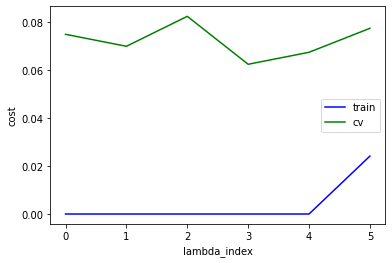

In [18]:
plt.plot(J_train_lambda,label="train",color="blue")
plt.plot(J_cv_lambda,label="cv",color="green")
plt.legend()
plt.ylabel("cost")
plt.xlabel("lambda_index")
plt.show()
# # plt.plot(J_train_lambda,label="train",color="blue")
# plt.plot(J_cv_lambda,label="cv",color="green")
# plt.legend()
# plt.ylabel("cost")
# plt.xlabel("lambda_index")
# plt.show()

Text(0.5, 0, 'alpha_index')

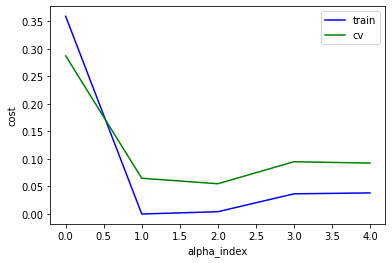

In [19]:
plt.plot(J_train_alpha,label="train",color="blue")
plt.plot(J_cv_alpha,label="cv",color="green")
plt.legend()
plt.ylabel("cost")
plt.xlabel("alpha_index")

In [20]:
print(f"lambda_list[{best_lambda_index}] = {lambda_list[best_lambda_index]}")
print(f"alpha_list[{best_alpha_index}] = {alpha_list[best_alpha_index]}")

lambda_list[3] = 1e-06
alpha_list[2] = 0.005


In [21]:
print(f"F1 score = {F1:.3f}")
print(f"ACCURACY and LOSS=>")
print(f"train: {(1-J_train):.3f}, {J_train:.3f}")
print(f"cv:    {(1-J_cv):.3f}, {J_cv:.3f}")
print(f"test:  {(1-J_test):.3f}, {J_test:.3f}")

F1 score = 0.890
ACCURACY and LOSS=>
train: 0.996, 0.004
cv:    0.945, 0.055
test:  0.925, 0.075


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

print(f"X_train size: {X_train.shape}, X_test size: {X_test.shape}")
print(f"y_train size: {y_train.shape}, y_test size: {y_test.shape}")

X_train size: (1600, 8), X_test size: (400, 8)
y_train size: (1600,), y_test size: (400,)


In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [24]:
from xgboost import XGBClassifier
model = XGBClassifier(max_depth=6)
model.fit(X_train,y_train)

XGBClassifier(max_depth=6)

In [25]:
loss,F1=DT_model_evaluation(y_test,model.predict(X_test))
print(f"Accuracy = {1-loss}, F1 = {F1}")

Accuracy = 0.955, F1 = 0.927419345535175


In [26]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state=10)
model = random_forest_model.fit(X_train, y_train)

In [27]:
loss,F1=DT_model_evaluation(y_test,model.predict(X_test))
print(f"Accuracy = {1-loss}, F1 = {F1}")

Accuracy = 0.995, F1 = 0.9921259842519685
